# 선형회귀 예시 (1) - 다이아몬드 가격에 영향을 미치는 요인

선형회귀분석 : `어떤 결론`을 내는데 `가장 크게 영향을 주는 변수를 찾아내는 과정`

## #01. 작업 준비

### 1. 패키지 참조

In [1]:
import numpy as np
from pandas import read_excel, DataFrame, melt, merge
from pca import pca
from pandas.api.types import CategoricalDtype
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from matplotlib import pyplot as plt
import seaborn as sb
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.api import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson

import sys
sys.path.append("../../")
import helper

## 데이터 준비

R의 시각화 패키지인 `ggplot2`에 내장되어 있는 데이터셋으로 총 10개의 요인으로 이루어져 있으며 `53,940`개의 관측치가 있다.

| 변수 | 의미 | 기타 |
|---|---|---|
| carat | 무게 | ex) 3캐럿짜리 다이아몬드 |
| cut | 세공의 질 | 다이아몬드의 단면을 어떻게 커팅하였는지에 대한 상태값을 분류<br/>'계층이 있는 범주형(factor)' 데이터<br/>"Fair", "Good", "Very Good", "Premium", "Ideal"로 나누어진다. |
| color | 컬러 | 총 7개의 컬러로 표기된 범주형 데이터<br/>
| clarity | 투명도 | 범주형 데이터 |
| depth | 깊이 | 수치형 데이터 |
| table | 넓은 폭 대비 꼭대기의 넓이 | 수치형 데이터 |
| price | 가격(`$`) | 수치형 데이터 |
| x | 길이 | 수치형 데이터 |
| y | 넓이 | 수치형 데이터 |
|  z | 깊이 | 수치형 데이터 |

In [2]:
origin = read_excel("https://data.hossam.kr/E04/diamonds.xlsx")
origin.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## #02. 데이터 전처리

### 1. DF 복사

In [3]:
edf = origin
edf.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### 결측치 확인

In [4]:
edf.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### dtypes 확인

회귀분석에서는 범주형 데이터는 제외(object 제외)

In [5]:
edf.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

### 4. 일단 분석

#### 1) 회귀분석

In [6]:
# 회귀분석에서는 범주형 데이터는 제외(object 제외)
tmp = edf.filter(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'])

ols_result = helper.myOls(tmp, y='price', x=['carat', 'depth', 'table', 'x', 'y', 'z'])
print(ols_result.summary)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                 5.486e+04
Date:                Thu, 10 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:25:47   Log-Likelihood:            -4.7090e+05
No. Observations:               53940   AIC:                         9.418e+05
Df Residuals:                   53933   BIC:                         9.419e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.085e+04    447.562     46.584      0.0

#### 결과보고

In [7]:
ols_result.table

print(ols_result.result, end="\n\n")
print(ols_result.goodness, end="\n\n")

for i in ols_result.varstr:
    print(i)

𝑅(0.859), 𝑅^2(0.859), 𝐹(5.486e+04), 유의확률(0.00), Durbin-Watson(1.249)

price에 대하여 carat,depth,table,x,y,z로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다(F(6,53933) = 5.486e+04, p < 0.05).

carat의 회귀계수는 1.069e+04(p<0.05)로, price에 대하여 유의미한 예측변인인 것으로 나타났다.
depth의 회귀계수는 -203.1541(p<0.05)로, price에 대하여 유의미한 예측변인인 것으로 나타났다.
table의 회귀계수는 -102.4457(p<0.05)로, price에 대하여 유의미한 예측변인인 것으로 나타났다.
x의 회귀계수는 -1315.6678(p<0.05)로, price에 대하여 유의미한 예측변인인 것으로 나타났다.
y의 회귀계수는 66.3216(p<0.05)로, price에 대하여 유의미한 예측변인인 것으로 나타났다.
z의 회귀계수는 41.6277(p>0.05)로, price에 대하여 유의하지 않은 예측변인인 것으로 나타났다.


#### 3) 잔차분석

R-squared가 높아도 유의미성과 신뢰성을 확신할 수 없기 때문

##### 결과치 생성

In [8]:
sdf = DataFrame({
    "관측값": edf['price'],
    "예측값": ols_result.fit.fittedvalues,
    "잔차": ols_result.fit.resid,
    "zscore": stats.zscore(ols_result.fit.fittedvalues)
})

sdf

,관측값,예측값,잔차,zscore
0,326,346.909718,-20.909718,-0.969700
1,326,-71.468765,397.468765,-1.082838
2,327,126.368674,200.631326,-1.029339
3,334,193.901639,140.098361,-1.011076
4,335,53.549591,281.450409,-1.049030
...,...,...,...,...
53935,2757,3314.909673,-557.909673,-0.167090
53936,2757,3135.402558,-378.402558,-0.215633
53937,2757,2503.140469,253.859531,-0.386610
53938,2757,4175.515769,-1418.515769,0.065635


#### 잔차의 정규성

##### Q-Q Plot

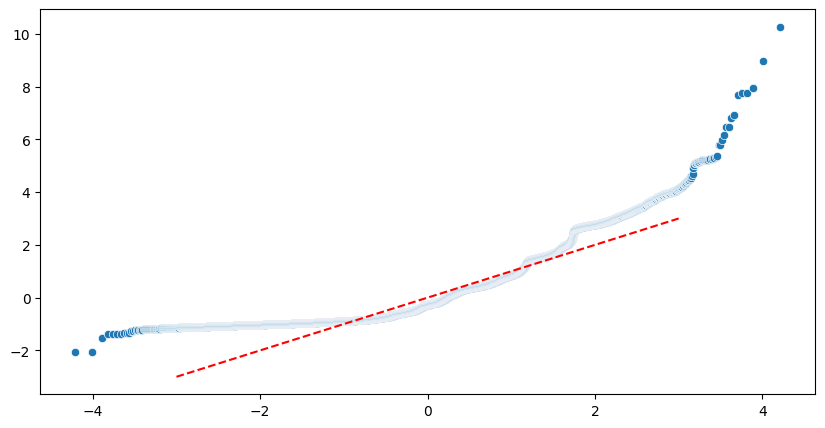

In [9]:
(x,y), _ = stats.probplot(sdf['zscore'])

plt.figure(figsize=(10, 5))
sb.scatterplot(x=x, y=y)
sb.lineplot(x=[-3, 3], y=[-3, 3], color='red', linestyle='--')
plt.show()
plt.close()

##### 정규성 판단을 위한 Kolmogorov Smirnov 검정

표본 수가 50개 이상인 경우 사용

샤피로 검정은 50개 미만

In [10]:
s, p = stats.kstest(sdf['잔차'], 'norm')
print("Kolmogorov Smirnov Test: (통계량, p-value) = ", (s, p))

if p > 0.05:
    print("잔차는 정규 분포를 따릅니다. (귀무가설 채택)")
else:
    print("잔차는 정규 분포를 따르지 않습니다. (귀무가설 기각)")

Kolmogorov Smirnov Test: (통계량, p-value) =  (0.5298424160387368, 0.0)
잔차는 정규 분포를 따르지 않습니다. (귀무가설 기각)


#### 잔차의 등분산성 (브로이슈 패건 검정)

In [11]:
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test_result = het_breuschpagan(ols_result.fit.resid, ols_result.fit.model.exog)
DataFrame(test_result, index=names)

,0
Lagrange multiplier statistic,9934.176446
p-value,0.000000
f-value,2029.200891
f p-value,0.000000


### 4. 범주형 타입 변환

describe 진행 시 제외용

#### 1) 순서 있는 범주형 설정

In [12]:
ctype = CategoricalDtype(categories=["Fair", "Good", "Very Good", "Premium", "Ideal"], ordered=True)

edf['cut'] = edf['cut'].astype(ctype)
edf.dtypes

carat       float64
cut        category
color        object
clarity      object
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

#### 2) 순서 없는 범주형 설정

In [13]:
edf['color'] = edf['color'].astype('category')
edf['clarity'] = edf['clarity'].astype('category')
edf.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

## #03. 요인선정을 위한 탐색적 데이터 분석

### 1. 수치형 변수

#### 1) 기초 통계량 확인

범주형 데이터는 자동으로 제외된다.

In [14]:
desc = edf.describe()
desc

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


#### 2) 상자그림 확인

일괄처리 - 범주형 변수는 자동으로 제외된다.

종속변수인 가격(price)를 제외하고는 비슷한 범위를 갖고 있으므로 표준화는 불필요한 것으로 판단

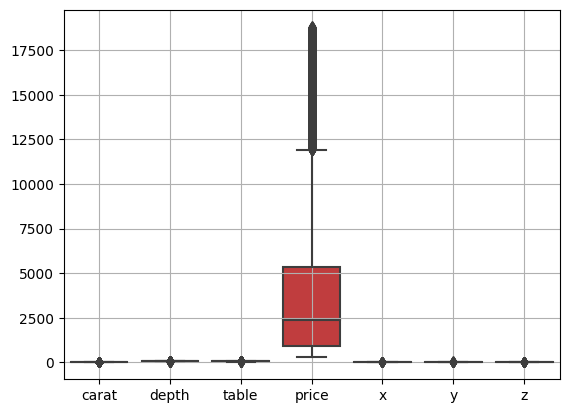

In [15]:
plt.figure()
sb.boxplot(data=edf)
plt.grid()
plt.show()
plt.close()

##### 개별 컬럼에 대한 상자그림

`범주형을 제외하고 처리`해야 하므로 `desribe()` 함수의 결과로 생성된 데이터프레임의 컬럼명에 대해서만 처리한다.

이상치가 다수 관측되지만 실제 데이터인 것으로 판단하고 정제하지 않기로 함

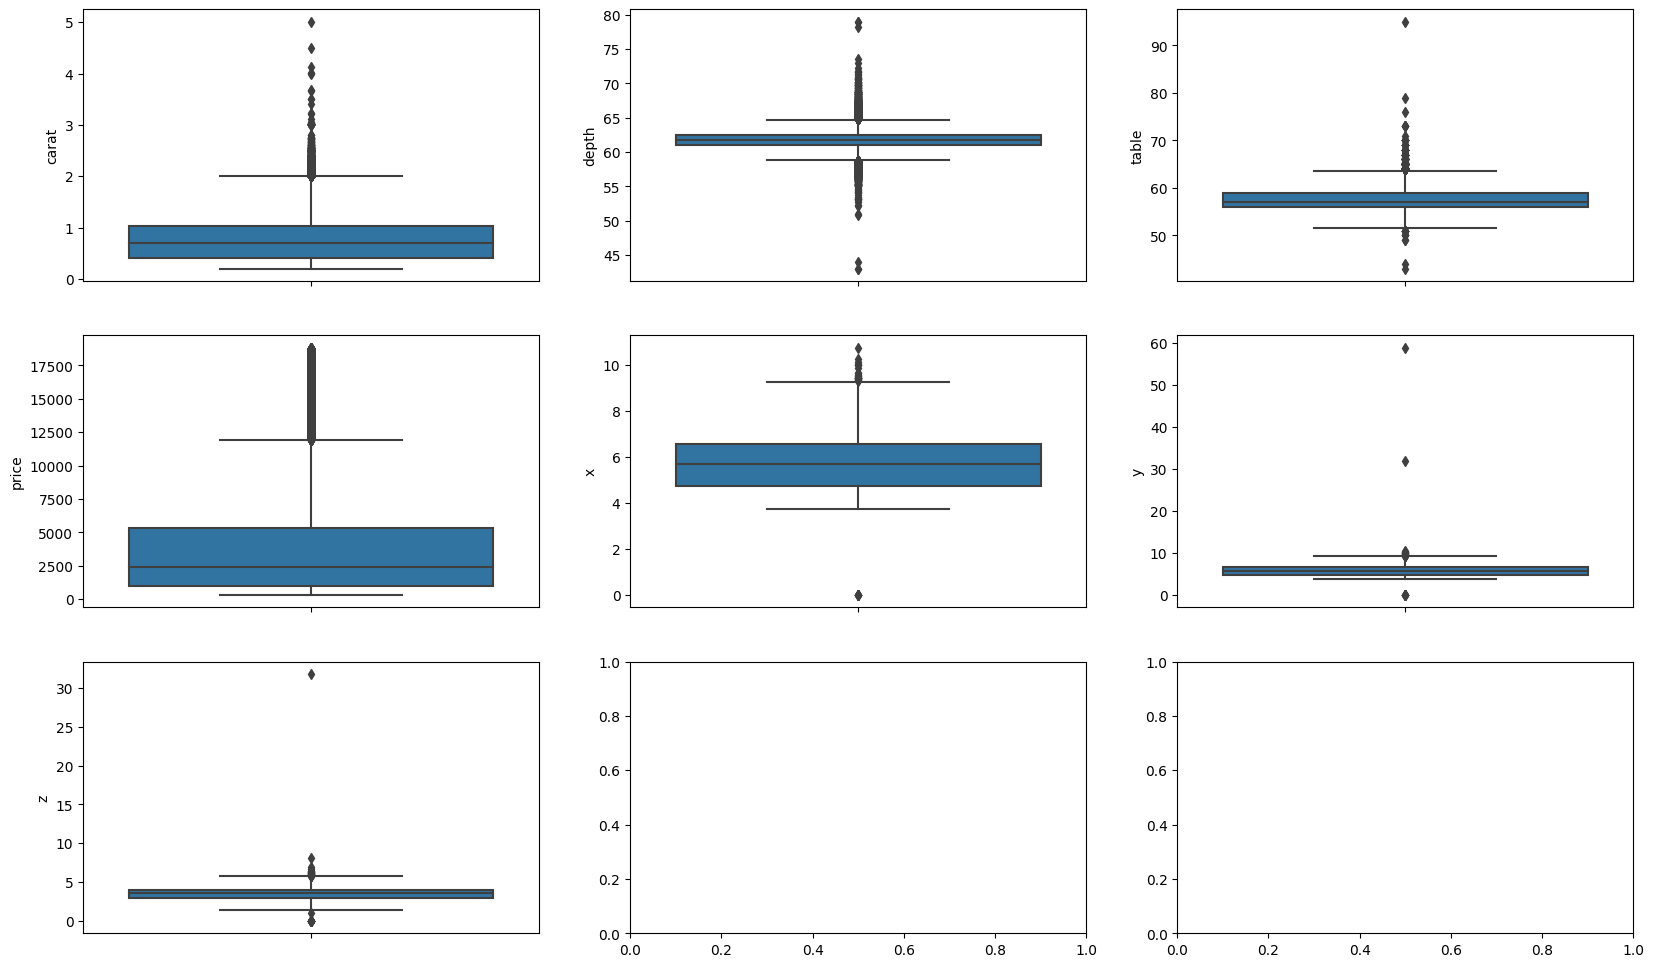

In [16]:
fig, ax = plt.subplots(3,3, figsize=(20,12))
rows = len(ax)
cols = len(ax[0])

for i in range(0, rows):
    for j in range(0, cols):
        idx = i*cols+j
        # print("idx=%d, i=%d, j=%d"%(idx,i,j))
        sb.boxplot(edf, y=desc.columns[idx], ax=ax[i][j])

        if idx+1 == len(desc.columns):
            break
plt.show()
plt.close()

#### 3) 산점도 행렬 확인

요인간의 `자기상관관계를 확인`하기 위해 `산점도 행렬을 확인`한다.

##### 범주형이 아닌 컬럼이름만 추출

In [17]:
cnames = []
dtypes = edf.dtypes

for i,v in enumerate(dtypes):
    if v != 'category':
        print(dtypes.index[i], dtypes[i])
        cnames.append(dtypes.index[i])

print(cnames)

carat float64
depth float64
table float64
price int64
x float64
y float64
z float64
['carat', 'depth', 'table', 'price', 'x', 'y', 'z']


##### 추출한 필드에 대한 산점도 행렬

> 시간이 오래 걸림.

일부 요인들 간에 상관관계가 발견된다.

In [18]:
# plt.figure(figsize=(30, 20))
# sb.pairplot(data=edf, vars=cnames, kind='reg')
# plt.show()
# plt.close()

#### 4) PCA 분석

`회귀분석에 필요한 요인들을 선정`하기 위해 `주성분 분석을 수행`한다.

##### 데이터 표준화

범주형은 PCA를 수행할 수 없기 때문에 `edf`에서 `수치형 변수만 추출하여 처리`한다.

`종속 변수`인 가격은 `제외하고 진행`한다.

In [19]:
x_train_std_df, y_train_std_df = helper.scalling(edf[cnames], 'price')
x_train_std_df

,carat,depth,table,x,y,z
0,-1.198168,-0.174092,-1.099672,-1.587837,-1.536196,-1.571129
1,-1.240361,-1.360738,1.585529,-1.641325,-1.658774,-1.741175
2,-1.198168,-3.385019,3.375663,-1.498691,-1.457395,-1.741175
3,-1.071587,0.454133,0.242928,-1.364971,-1.317305,-1.287720
4,-1.029394,1.082358,0.242928,-1.240167,-1.212238,-1.117674
...,...,...,...,...,...,...
53935,-0.164427,-0.662711,-0.204605,0.016798,0.022304,-0.054888
53936,-0.164427,0.942753,-1.099672,-0.036690,0.013548,0.100988
53937,-0.206621,0.733344,1.137995,-0.063434,-0.047741,0.030135
53938,0.130927,-0.523105,0.242928,0.373383,0.337506,0.285204


##### PCA

In [20]:
model = pca()
# 표준화 결과를 활용하여 주성분 분석 수행
fit = model.fit_transform(x_train_std_df)
topfeat = fit['topfeat']
topfeat

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]


[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


,PC,feature,loading,type
0,PC1,x,0.500910,best
1,PC2,depth,-0.734082,best
2,PC3,table,0.732523,best
3,PC1,carat,0.495367,weak
4,PC1,y,0.495218,weak
5,PC1,z,0.493882,weak


##### 주성분 선정

In [21]:
best = topfeat.query("type=='best'")
best_names = list(set(list(best['feature'])))
best_names

['depth', 'table', 'x']

### 2. 범주형 변수

#### 범주형만 추출

In [22]:
cnames = []
dtypes = edf.dtypes

for i, v in enumerate(dtypes):
    if v == 'category':
        print(dtypes.index[i], dtypes[i])
        cnames.append(dtypes.index[i])
        
print(cnames)

cut category
color category
clarity category
['cut', 'color', 'clarity']


#### 범주형 데이터 분포 확인

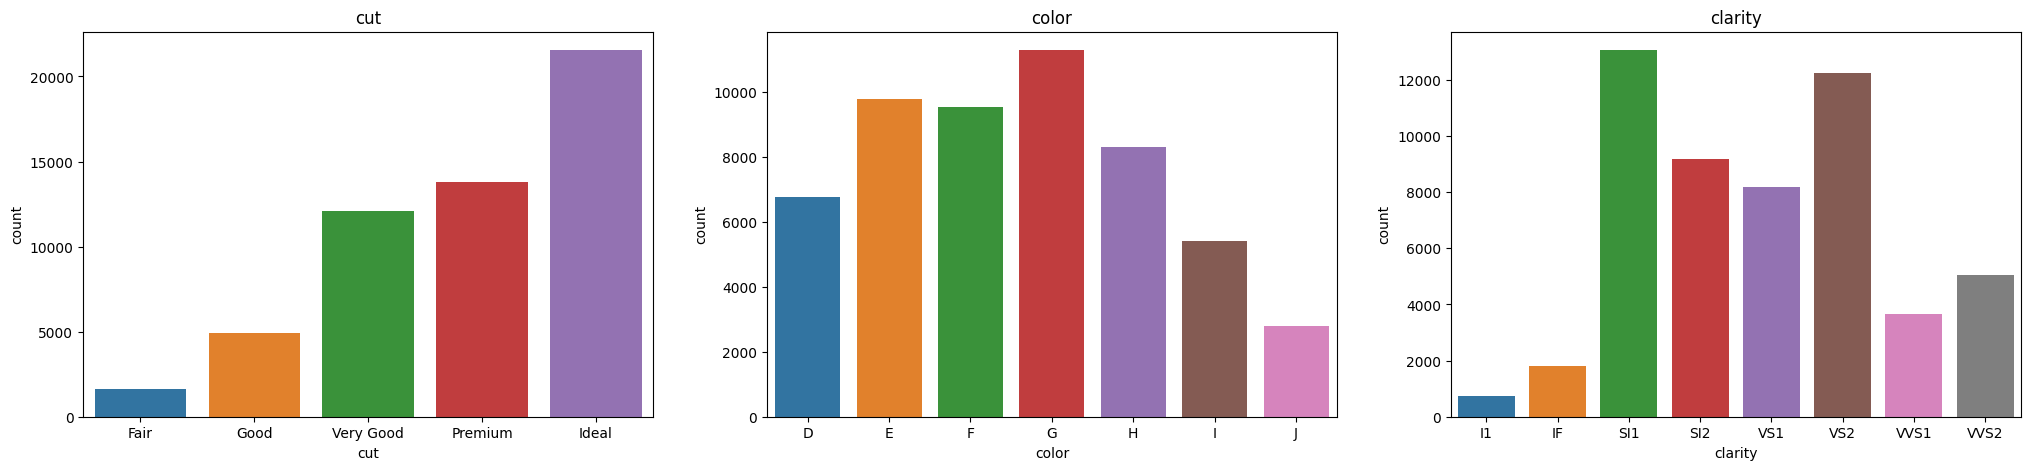

In [23]:
fig, ax = plt.subplots(1, len(cnames), figsize=(25,5))

for i,v in enumerate(cnames):
    vc = DataFrame(edf[v].value_counts(), columns=['count'])
    # print(vc)
    sb.barplot(data=vc, x=vc.index, y='count', ax=ax[i])
    ax[i].set_title(v)
    
plt.show()
plt.close()

#### `cut` 변수에 대한 분산분석

##### 데이터 타입 확인

범주형

In [24]:
edf['cut'].dtypes

CategoricalDtype(categories=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], ordered=True)

##### 범주형 변수의 종류 추출

In [25]:
edf['cut'].dtypes.categories

Index(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], dtype='object')

##### 범주형 변수에 대한 라벨링 값 생성

In [26]:
mydict = {}

for i, v in enumerate(edf['cut'].dtypes.categories):
    mydict[v] = i
    
mydict

{'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}

##### 라벨링 처리

In [27]:
tmp_df = edf.filter(['price', 'cut'])
tmp_df['cut'] = tmp_df['cut'].map(mydict).astype('int')
tmp_df

,price,cut
0,326,4
1,326,3
2,327,1
3,334,3
4,335,1
...,...,...
53935,2757,4
53936,2757,1
53937,2757,2
53938,2757,3


##### 분산분석에 대한 적합성 검정

조건을 충족하지 않으므로 이 요인은 제외하는 것으로 결정한다.

`정규성, 등분산성, 독립성을 모두 검정`

In [28]:
helper.allTest(tmp_df['price'], tmp_df['cut'])

c:\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


+----------+--------------+----------+-------------+-----------+----------+
|          | field        | test     |   statistic |   p-value | result   |
|----------+--------------+----------+-------------+-----------+----------|
| 정규성   | price        | shapiro  |    0.798108 |         0 | False    |
| 정규성   | cut          | shapiro  |    0.840702 |         0 | False    |
| 정규성   | price        | shapiro  |     15096.6 |         0 | False    |
| 정규성   | cut          | shapiro  |     4332.54 |         0 | False    |
| 정규성   | price vs cut | ks_2samp |           1 |         0 | False    |
| 정규성   | cut vs price | ks_2samp |           1 |         0 | False    |
| 등분산성 | price vs cut | Bartlett |      807780 |         0 | False    |
| 등분산성 | price vs cut | Fligner  |     67384.1 |         0 | False    |
| 등분산성 | price vs cut | Levene   |     40950.1 |         0 | False    |
| 독립성   | price vs cut | Chi2     |      324145 |         0 | False    |
+----------+--------------+----------+-------

#### `color` 변수에 대한 검정

In [29]:
yname = 'price'
xname = 'color'
mydict = {}

for i, v in enumerate(edf[xname].dtypes.categories):
    mydict[v] = i
#mydict

tmp_df = edf.filter([yname, xname])
tmp_df[xname] = tmp_df[xname].map(mydict).astype('int')
#tmp_df

helper.allTest(tmp_df[yname], tmp_df[xname])

c:\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


+----------+----------------+----------+-------------+-----------+----------+
|          | field          | test     |   statistic |   p-value | result   |
|----------+----------------+----------+-------------+-----------+----------|
| 정규성   | price          | shapiro  |    0.798108 |         0 | False    |
| 정규성   | color          | shapiro  |    0.940571 |         0 | False    |
| 정규성   | price          | shapiro  |     15096.6 |         0 | False    |
| 정규성   | color          | shapiro  |      6626.9 |         0 | False    |
| 정규성   | price vs color | ks_2samp |           1 |         0 | False    |
| 정규성   | color vs price | ks_2samp |           1 |         0 | False    |
| 등분산성 | price vs color | Bartlett |      762365 |         0 | False    |
| 등분산성 | price vs color | Fligner  |     66621.1 |         0 | False    |
| 등분산성 | price vs color | Levene   |     40934.5 |         0 | False    |
| 독립성   | price vs color | Chi2     |      334347 |         0 | False    |
+----------+-------

#### `clarity` 변수에 대한 검정

In [30]:
yname = 'price'
xname = 'clarity'
mydict = {}

for i, v in enumerate(edf[xname].dtypes.categories):
    mydict[v] = i
#mydict

tmp_df = edf.filter([yname, xname])
tmp_df[xname] = tmp_df[xname].map(mydict).astype('int')
#tmp_df

helper.allTest(tmp_df[yname], tmp_df[xname])

c:\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


+----------+------------------+----------+-------------+-----------+----------+
|          | field            | test     |   statistic |   p-value | result   |
|----------+------------------+----------+-------------+-----------+----------|
| 정규성   | price            | shapiro  |    0.798108 |         0 | False    |
| 정규성   | clarity          | shapiro  |    0.935033 |         0 | False    |
| 정규성   | price            | shapiro  |     15096.6 |         0 | False    |
| 정규성   | clarity          | shapiro  |     5334.54 |         0 | False    |
| 정규성   | price vs clarity | ks_2samp |           1 |         0 | False    |
| 정규성   | clarity vs price | ks_2samp |           1 |         0 | False    |
| 등분산성 | price vs clarity | Bartlett |      760886 |         0 | False    |
| 등분산성 | price vs clarity | Fligner  |     66703.3 |         0 | False    |
| 등분산성 | price vs clarity | Levene   |     40933.8 |         0 | False    |
| 독립성   | price vs clarity | Chi2     |      492832 |         0 | Fals

## #04. 회귀분석 수행

### 1. 최종 요인 선정

검정 결과 `범주형 변수`는 `정규성, 등분산성, 독립성을 충족하지 않기 때문에 요인에서 제외`하였다.

그러므로 최초에 생성했던 `수치형 변수들에 대한 표준화 결과로만 구성된 데이터프레임`을 만들었다.

그 후 생성된 데이터 프레임에서 `PCA 분석 결과로 선정된 독립변수들과 종속변수만 추출`하였다.

In [31]:
best_names

['depth', 'table', 'x']

In [32]:
target_names = best_names + ['price']
target_names

['depth', 'table', 'x', 'price']

In [34]:
merge_df = merge(x_train_std_df, y_train_std_df, left_index=True, right_index=True)
df = merge_df.filter(target_names)
df.head()

,depth,table,x,price
0,-0.174092,-1.099672,-1.587837,-0.904095
1,-1.360738,1.585529,-1.641325,-0.904095
2,-3.385019,3.375663,-1.498691,-0.903844
3,0.454133,0.242928,-1.364971,-0.902090
4,1.082358,0.242928,-1.240167,-0.901839


### 2. 1차 회귀분석 수행

#### 1) 분석

In [35]:
ols_result = helper.myOls(df, y='price', x=best_names)
print(ols_result.summary)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                 6.541e+04
Date:                Thu, 10 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:33:59   Log-Likelihood:                -35157.
No. Observations:               53940   AIC:                         7.032e+04
Df Residuals:                   53936   BIC:                         7.036e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.96e-16      0.002    9.8e-14      1.0

#### 2) 결과 보고

In [36]:
ols_result.table

B   표준오차  β         t   유의확률       VIF
종속변수  독립변수                                               
price depth  -0.0023  0.002  0   -1.090*  0.276  1.097216
      table  -0.0481  0.002  0  -22.549*  0.000  1.150738
      x       0.8938  0.002  0  438.159*  0.000  4.746060

In [37]:
print(ols_result.result, end="\n\n")
print(ols_result.goodness, end="\n\n")
for i in ols_result.varstr:
    print(i)

𝑅(0.784), 𝑅^2(0.784), 𝐹(6.541e+04), 유의확률(0.00), Durbin-Watson(0.448)

price에 대하여 depth,table,x로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다(F(3,53936) = 6.541e+04, p < 0.05).

depth의 회귀계수는 -0.0023(p>0.05)로, price에 대하여 유의하지 않은 예측변인인 것으로 나타났다.
table의 회귀계수는 -0.0481(p<0.05)로, price에 대하여 유의미한 예측변인인 것으로 나타났다.
x의 회귀계수는 0.8938(p<0.05)로, price에 대하여 유의미한 예측변인인 것으로 나타났다.


### 2. 2차 분석

통계적으로 `유의하지 않은 depth를 제외`하고 다시 수행하여 `설명력의 차이를 확인`한다.

#### 1) 요인 제거

In [39]:
df2 = df.drop('depth', axis=1)
df2.head()

,table,x,price
0,-1.099672,-1.587837,-0.904095
1,1.585529,-1.641325,-0.904095
2,3.375663,-1.498691,-0.903844
3,0.242928,-1.364971,-0.902090
4,0.242928,-1.240167,-0.901839


#### 2) 분석 수행 및 결과보고

In [40]:
ols_result = helper.myOls(df2, y='price', x=['x', 'table'])
print(ols_result.summary)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                 9.811e+04
Date:                Thu, 10 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:41:32   Log-Likelihood:                -35158.
No. Observations:               53940   AIC:                         7.032e+04
Df Residuals:                   53937   BIC:                         7.035e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -4.25e-17      0.002  -2.13e-14      1.0

In [41]:
ols_result.table

B   표준오차  β         t   유의확률       VIF
종속변수  독립변수                                               
price x       0.8937  0.002  0  438.384*  0.000  4.744087
      table  -0.0474  0.002  0  -23.273*  0.000  1.050114

In [42]:
sdf = DataFrame({
    "관측값": df2['price'],
    "예측값": ols_result.fit.fittedvalues,
    "잔차": ols_result.fit.resid,
    "zscore": stats.zscore(ols_result.fit.fittedvalues)
})

sdf

,관측값,예측값,잔차,zscore
0,-0.904095,-1.366881,0.462786,-1.543350
1,-0.904095,-1.542085,0.637990,-1.741174
2,-0.903844,-1.499547,0.595702,-1.693144
3,-0.902090,-1.231406,0.329316,-1.390384
4,-0.901839,-1.119867,0.218028,-1.264446
...,...,...,...,...
53935,-0.294731,0.024720,-0.319451,0.027911
53936,-0.294731,0.019385,-0.314116,0.021888
53937,-0.294731,-0.110685,-0.184046,-0.124974
53938,-0.294731,0.322168,-0.616899,0.363761


In [43]:
print(ols_result.result, end="\n\n")
print(ols_result.goodness, end="\n\n")

for i in ols_result.varstr:
    print(i)

𝑅(0.784), 𝑅^2(0.784), 𝐹(9.811e+04), 유의확률(0.00), Durbin-Watson(0.447)

price에 대하여 x,table로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다(F(2,53937) = 9.811e+04, p < 0.05).

x의 회귀계수는 0.8937(p<0.05)로, price에 대하여 유의미한 예측변인인 것으로 나타났다.
table의 회귀계수는 -0.0474(p<0.05)로, price에 대하여 유의미한 예측변인인 것으로 나타났다.
